In [1]:
import os
import pandas as pd

# Get all subdirs in "preprocessed_workers"
base_dir = "preprocessed_workers"
combined_dir = "combined_data"

# Create 'combined_data' directory if it doesn't exist
os.makedirs(combined_dir, exist_ok=True)

# Iterate over each subdirectory
for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)

    if os.path.isdir(subfolder_path):
        # List to store DataFrames
        data_frames = []

        # Iterate over possible worker{id}.feather files
        for worker_id in range(1, 6):
            feather_file = f"worker{worker_id}.feather"
            feather_path = os.path.join(subfolder_path, feather_file)
            if os.path.exists(feather_path):
                df = pd.read_feather(feather_path)
                data_frames.append(df)

        if data_frames:
            # Find common columns across all DataFrames
            common_columns = list(set(data_frames[0].columns))
            for df in data_frames[1:]:
                common_columns = list(set(common_columns).intersection(df.columns))

            # Keep only common columns in each DataFrame
            data_frames = [df[common_columns] for df in data_frames]

            # Combine all data frames
            combined_df = pd.concat(data_frames, ignore_index=True, axis=0)
            # Save combined dataframe to "combined_data" directory
            combined_feather_path = os.path.join(combined_dir, f"{subfolder}.feather")
            combined_df.to_feather(combined_feather_path)
            print(f"Saved combined DataFrame to: {combined_feather_path}")

Saved combined DataFrame to: combined_data/1730280141_yolov9e_1280.feather
Saved combined DataFrame to: combined_data/1730215709_yolov9c_160.feather
Saved combined DataFrame to: combined_data/1730211503_yolov10l_160.feather
Saved combined DataFrame to: combined_data/1730251802_yolov8n_640.feather
Saved combined DataFrame to: combined_data/1730230004_yolov9t_320.feather
Saved combined DataFrame to: combined_data/1730257386_yolo11s_1280.feather
Saved combined DataFrame to: combined_data/1730214868_yolov9m_160.feather
Saved combined DataFrame to: combined_data/1730222435_yolo11s_320.feather
Saved combined DataFrame to: combined_data/1730263696_yolo11x_1280.feather
Saved combined DataFrame to: combined_data/1730206458_yolo11m_160.feather
Saved combined DataFrame to: combined_data/1730247262_yolov9t_640.feather
Saved combined DataFrame to: combined_data/1730272260_yolov9t_1280.feather
Saved combined DataFrame to: combined_data/1730221594_yolo11n_320.feather
Saved combined DataFrame to: comb

Saved combined DataFrame to: combined_data/1730280141_yolov9e_1280.feather
Saved combined DataFrame to: combined_data/1730215709_yolov9c_160.feather
Saved combined DataFrame to: combined_data/1730211503_yolov10l_160.feather
Saved combined DataFrame to: combined_data/1730251802_yolov8n_640.feather
Saved combined DataFrame to: combined_data/1730230004_yolov9t_320.feather
Saved combined DataFrame to: combined_data/1730257386_yolo11s_1280.feather
Saved combined DataFrame to: combined_data/1730214868_yolov9m_160.feather
Saved combined DataFrame to: combined_data/1730222435_yolo11s_320.feather
Saved combined DataFrame to: combined_data/1730263696_yolo11x_1280.feather
Saved combined DataFrame to: combined_data/1730206458_yolo11m_160.feather
Saved combined DataFrame to: combined_data/1730247262_yolov9t_640.feather
Saved combined DataFrame to: combined_data/1730272260_yolov9t_1280.feather
Saved combined DataFrame to: combined_data/1730221594_yolo11n_320.feather
Saved combined DataFrame to: comb

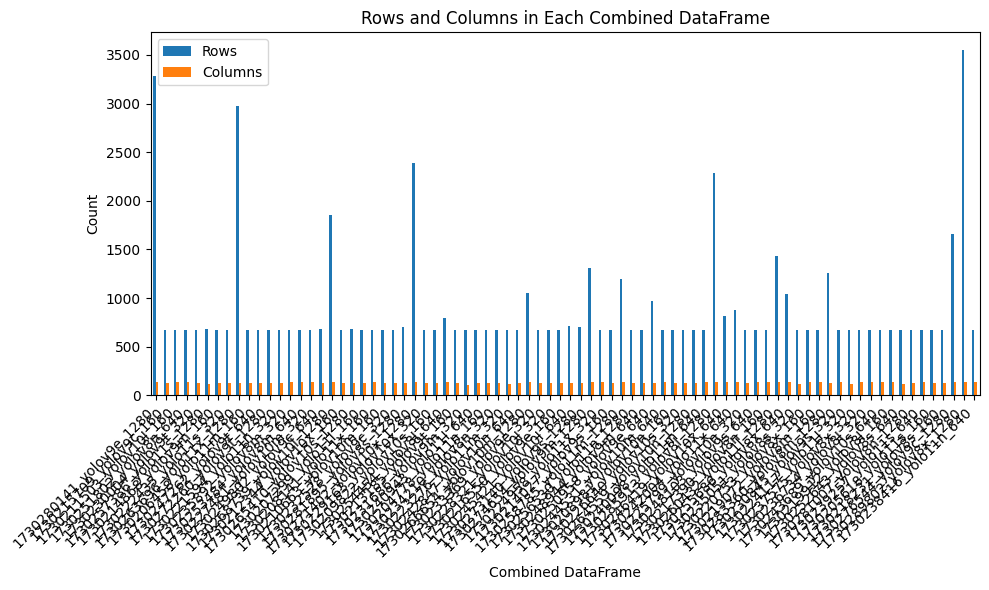

Number of unique columns across all combined DataFrames: 258


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Get all subdirs in "preprocessed_workers"
base_dir = "preprocessed_workers"
combined_dir = "combined_data"

# Create 'combined_data' directory if it doesn't exist
os.makedirs(combined_dir, exist_ok=True)

# To track the number of rows and columns for each combined DataFrame
rows_columns_info = []

# To track unique columns across all combined dataframes
unique_columns_set = set()

# Iterate over each subdirectory
for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)

    if os.path.isdir(subfolder_path):
        # List to store DataFrames
        data_frames = []

        # Iterate over possible worker{id}.feather files
        for worker_id in range(1, 6):
            feather_file = f"worker{worker_id}.feather"
            feather_path = os.path.join(subfolder_path, feather_file)
            if os.path.exists(feather_path):
                df = pd.read_feather(feather_path)
                data_frames.append(df)

        if data_frames:
            # Find common columns across all DataFrames
            common_columns = list(set(data_frames[0].columns))
            for df in data_frames[1:]:
                common_columns = list(set(common_columns).intersection(df.columns))

            # Keep only common columns in each DataFrame
            data_frames = [df[common_columns] for df in data_frames]

            # Combine all data frames
            combined_df = pd.concat(data_frames, ignore_index=True, axis=0)

            # Save combined dataframe to "combined_data" directory
            combined_feather_path = os.path.join(combined_dir, f"{subfolder}.feather")
            combined_df.to_feather(combined_feather_path)
            print(f"Saved combined DataFrame to: {combined_feather_path}")

            # Record rows and columns of the combined DataFrame
            rows_columns_info.append((subfolder, combined_df.shape[0], combined_df.shape[1]))

            # Update unique columns set with columns from combined DataFrame
            unique_columns_set.update(combined_df.columns)

# Plot the number of rows and columns for each combined DataFrame
if rows_columns_info:
    df_info = pd.DataFrame(rows_columns_info, columns=["Combined DataFrame", "Rows", "Columns"])
    df_info.plot(x="Combined DataFrame", y=["Rows", "Columns"], kind="bar", figsize=(10, 6))
    plt.ylabel("Count")
    plt.title("Rows and Columns in Each Combined DataFrame")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Compute and display number of unique columns across all combined DataFrames
num_unique_columns = len(unique_columns_set)
print(f"Number of unique columns across all combined DataFrames: {num_unique_columns}")